<a href="https://colab.research.google.com/github/GaCampioto/tech-challenges-fiap-AI-for-developers/blob/main/tech_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Challenge

A partir de uma base de dados contendo informações sobre cobranças de encargos de seguro saúde, deve-se desenvolver um modelo preditivo visando prever novos valores cobrados.

A base disponibilizada inicialmente está em pt-br e contém apenas 3 registros, o que inviabilizaria o correto desenvolvimento do modelo preditivo. Para sanar esse problema o grupo realizou uma busca dentro dos próprios módulos da pós tech e encontrou uma base que contém as mesmas informações, porém em inglês.

Para iniciar o tech challenge vamos transformar a base pt-br em en-us e concatenar os dois dataframes.

# 1. Análise dos dados

## Importando, traduzindo e concatenando as bases

In [ ]:
import pandas as pd

df_pt_br = pd.read_csv("seguro_saude.csv")
df_en_us = pd.read_csv("insurance.csv")

In [ ]:
# visualizando a base pt-br
df_pt_br.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,56,feminino,29.774374,2,sim,sudoeste,31109.889763
1,46,masculino,25.857395,1,não,nordeste,26650.702647
2,32,masculino,23.014840,0,não,sudoeste,21459.037990


In [ ]:
# visualizando a base en-us
df_en_us.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# renomeando as colunas
column_names = {
    "idade": "age",
    "gênero": "sex",
    "imc": "bmi",
    "filhos": "children",
    "fumante": "smoker",
    "região": "region",
    "encargos": "charges",
}

df_pt_br = df_pt_br.rename(columns = column_names)
df_pt_br

,age,sex,bmi,children,smoker,region,charges
0,56,feminino,29.774374,2,sim,sudoeste,31109.889763
1,46,masculino,25.857395,1,não,nordeste,26650.702647
2,32,masculino,23.014840,0,não,sudoeste,21459.037990


In [ ]:
# traduzindo variáveis em pt-br para en-us
df_pt_br['sex'] = df_pt_br['sex'].replace(['feminino', 'masculino'], ['female', 'male'])
df_pt_br['smoker'] = df_pt_br['smoker'].replace(['sim', 'não'], ['yes', 'no'])
df_pt_br['region'] = df_pt_br['region'].replace(['sudoeste', 'nordeste'], ['southwest', 'northeast'])

df_pt_br

,age,sex,bmi,children,smoker,region,charges
0,56,female,29.774374,2,yes,southwest,31109.889763
1,46,male,25.857395,1,no,northeast,26650.702647
2,32,male,23.014840,0,no,southwest,21459.037990


In [ ]:
# verificando dimensões do df_pt_br
df_pt_br.shape

(3, 7)

In [ ]:
# verificando dimensões do df_en_us
df_en_us.shape

(1338, 7)

In [ ]:
# concatenando os dataframes e verificando as dimensões

df = pd.concat([df_pt_br, df_en_us], axis=0)
df.shape

(1341, 7)

In [ ]:
# informações relevantes sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1341 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1341 non-null   int64  
 1   sex       1341 non-null   object 
 2   bmi       1341 non-null   float64
 3   children  1341 non-null   int64  
 4   smoker    1341 non-null   object 
 5   region    1341 non-null   object 
 6   charges   1341 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.8+ KB


In [ ]:
# informações mais detalhadas sobre o dataframe (média, desvio padrão, min, max, etc)
df.describe()

,age,bmi,children,charges
count,1341.000000,1341.000000,1341.000000,1341.000000
mean,39.219239,30.653446,1.094705,13299.809561
std,14.044321,6.096393,1.204770,12113.807202
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4746.344000
50%,39.000000,30.360000,1.000000,9391.346000
75%,51.000000,34.675000,2.000000,16796.411940
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# verificação de dados nullos dentro do dataframe
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

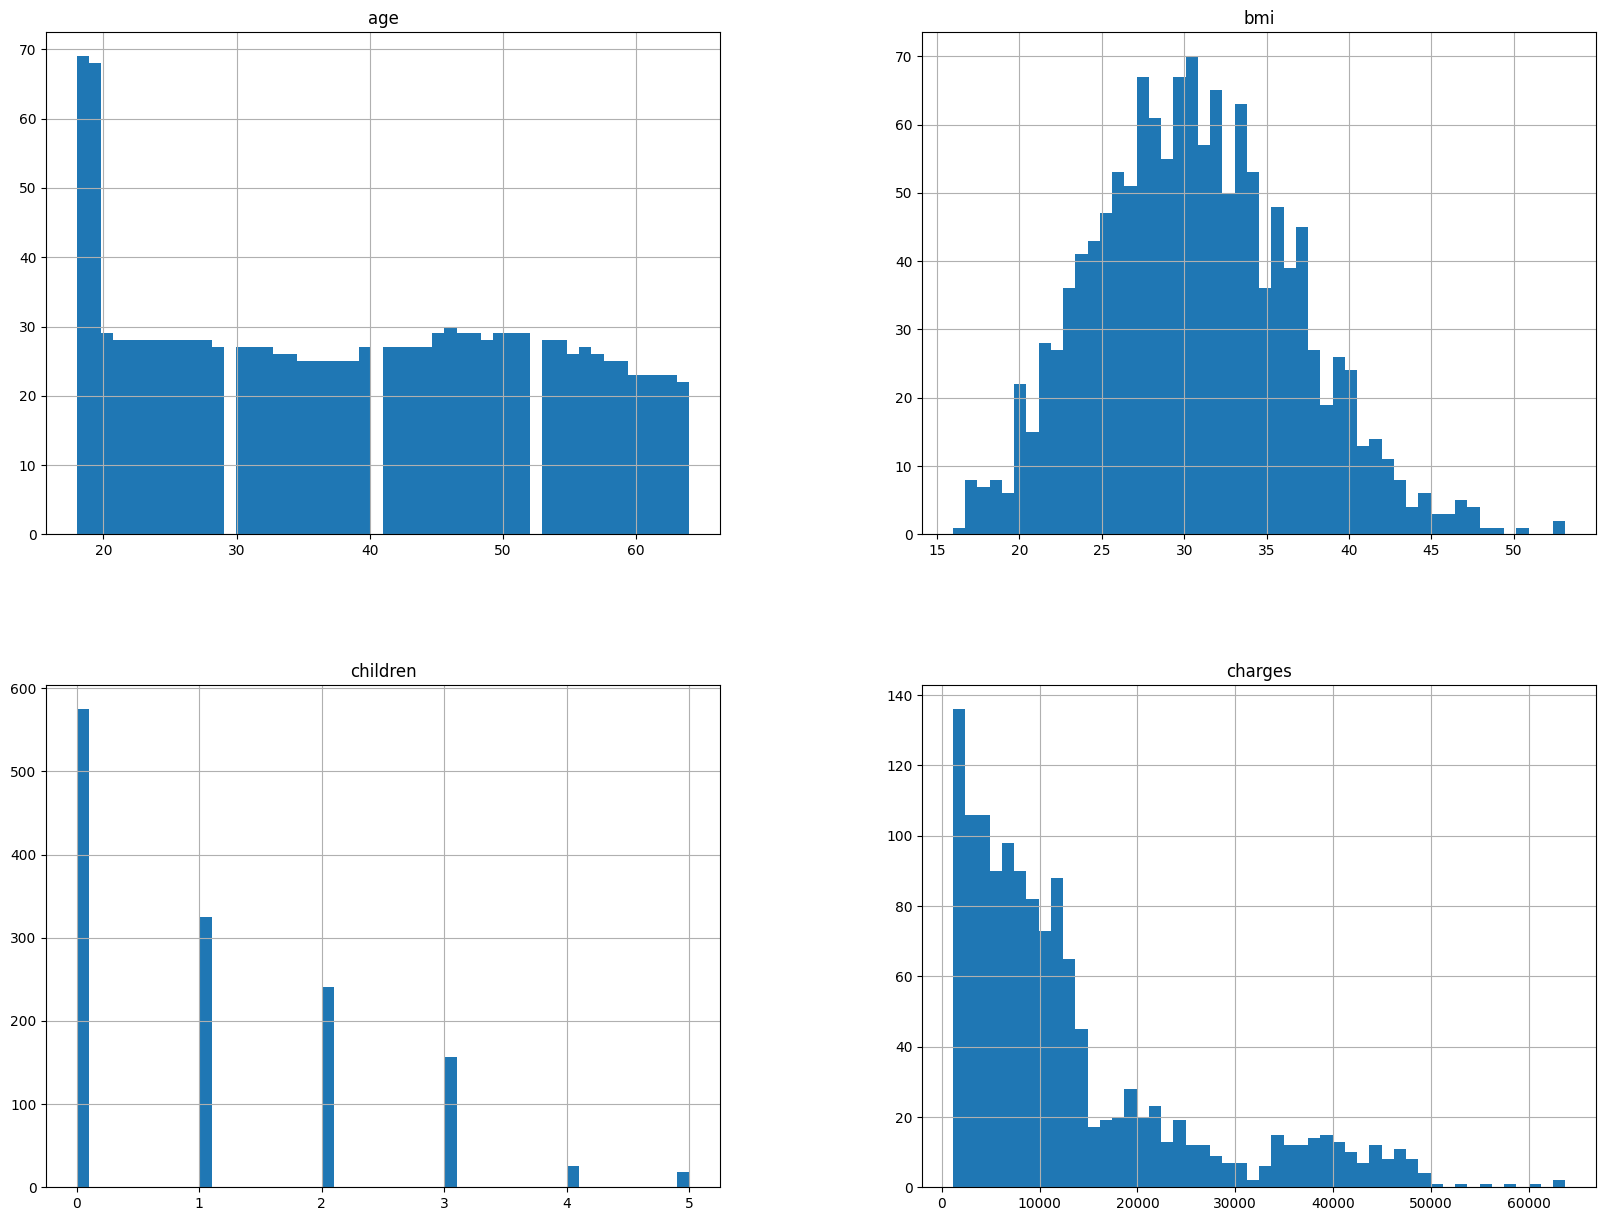

In [ ]:
# visualização do df.describe() em forma de gráfico de distribuição
df.hist(bins=50, figsize=(20,15))

In [ ]:
from scipy.stats import shapiro

# verificando distribuição normal para as colunas numéricas
for column in ['age', 'bmi', 'children', 'charges']:
  stat, p_value = shapiro(df[column])
  print(f'Variável {column}, estatistíca de teste: {stat}, valor p: {p_value}')

  # interpretando o valor p para determinar se a variável segue distribuição normal
  if p_value > 0.05:
    print(f'A variável {column} parece seguir uma distribuição normal.\n')
  else :
    print(f'A variável {column} parece não seguir uma distribuição normal.\n')

Variável age, estatistíca de teste: 0.9448111057281494, valor p: 5.639655216281888e-22
A variável age parece não seguir uma distribuição normal.

Variável bmi, estatistíca de teste: 0.9937984347343445, valor p: 2.1818503228132613e-05
A variável bmi parece não seguir uma distribuição normal.

Variável children, estatistíca de teste: 0.8232885599136353, valor p: 4.777565908740128e-36
A variável children parece não seguir uma distribuição normal.

Variável charges, estatistíca de teste: 0.8161655068397522, valor p: 1.3708984936527756e-36
A variável charges parece não seguir uma distribuição normal.



Observações com relação ao dataframe:

1 - charges: é a variável target com valor máximo de USD 63770.428010, ou seja, este será o limite do nosso modelo preditivo.

2 - os dados não apresentam distribuição normal.

3 - embora **age** e **bmi** parecem ter escalas próximas, as demais são completamente diferentes. Sendo que 2 são binárias (**sex, smoker**) e uma tem apenas 4 opções (**region**), o que indica a necessidade de padronização e normalização dos dados

4 - a base não possui colunas nulas

# 2. Separação dos dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['charges']) # features
y = df['charges'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)


# 3. Análise Exploratório de Dados

## Buscando correlações

<Axes: >

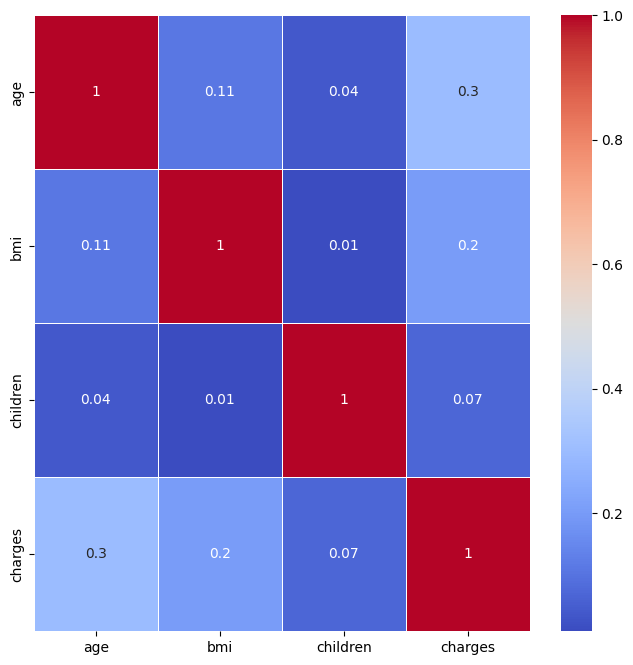

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

Observando a matriz de correlação é possível visualizar que não existe nenhuma correlação muito forte entre os dados numéricos do dataset.

As maiores correlações são:
- **age** e **bmi**
- **age** e **charges**
- **bmi** e **charges**

# 4. Limpeza e transformação dos dados

## Função de pipeline para padronizar os dados

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        """
        Inicializa a instância da classe.

        Parâmetros:
        - columns: Lista de nomes de colunas a serem codificadas.
        """
        self.columns = columns
        self.label_encoders = {}

    def fit(self, X, y=None):
        """
        Ajusta os codificadores de rótulos com base nos dados de entrada.

        Parâmetros:
        - X: Os dados de entrada.
        - y: Não é utilizado neste caso.

        Retorna:
        - A própria instância da classe.
        """
        # Cria uma cópia dos dados de entrada
        X_copy = X.copy()

        # Para cada coluna especificada em self.columns
        for column in self.columns:
            # Cria um novo LabelEncoder
            le = LabelEncoder()
            # Ajusta o LabelEncoder aos valores únicos dessa coluna
            le.fit(X_copy[column])
            # Armazena o LabelEncoder no dicionário label_encoders
            self.label_encoders[column] = le

        # Retorna a própria instância da classe
        return self

    def transform(self, X):
        """
        Transforma os dados de entrada usando os codificadores de rótulos previamente ajustados.

        Parâmetros:
        - X: Os dados de entrada a serem transformados.

        Retorna:
        - Os dados transformados.
        """
        # Cria uma cópia dos dados de entrada
        X_copy = X.copy()

        # Para cada coluna especificada em self.columns
        for column, le in self.label_encoders.items():
            # Substitui os valores dessa coluna pelos valores codificados
            X_copy[column] = le.transform(X_copy[column])

        # Retorna os dados transformados
        return X_copy

## Função de pipeline para normalizar os dados


In [ ]:
from sklearn.preprocessing import MinMaxScaler

class CustomMinMaxScaler(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        """
        Inicializa a instância da classe.

        Parâmetros:
        - columns: Lista de nomes de colunas a serem escalonadas.
        """
        self.columns = columns
        self.scalers = {}

    def fit(self, X, y=None):
        """
        Ajusta os escalonadores com base nos dados de entrada.

        Parâmetros:
        - X: Os dados de entrada.
        - y: Não é utilizado neste caso.

        Retorna:
        - A própria instância da classe.
        """
        # Cria uma cópia dos dados de entrada
        X_copy = X.copy()

        # Para cada coluna especificada em self.columns
        for column in self.columns:
            # Cria um novo MinMaxScaler
            scaler = MinMaxScaler()
            # Ajusta o MinMaxScaler aos valores dessa coluna
            scaler.fit(X_copy[[column]])
            # Armazena o MinMaxScaler no dicionário scalers
            self.scalers[column] = scaler

        # Retorna a própria instância da classe
        return self

    def transform(self, X):
        """
        Transforma os dados de entrada usando os escalonadores previamente ajustados.

        Parâmetros:
        - X: Os dados de entrada a serem transformados.

        Retorna:
        - Os dados transformados.
        """
        # Cria uma cópia dos dados de entrada
        X_copy = X.copy()

        # Para cada coluna especificada em self.columns
        for column, scaler in self.scalers.items():
            # Substitui os valores dessa coluna pelos valores escalonados
            X_copy[column] = scaler.transform(X_copy[[column]])

        # Retorna os dados transformados
        return X_copy

## Pré processamento

Construção do pipeline de pré processamento do dataframe

In [ ]:
from sklearn.pipeline import Pipeline

def pipeline(df):
    pipeline = Pipeline([
        ('label_encoder', CustomLabelEncoder(columns=['sex', 'smoker', 'region'])), # padronização
        ('min_max', CustomMinMaxScaler(columns=df.columns)) # normalização
    ])
    df_pipeline = pipeline.fit_transform(df)
    return df_pipeline

In [ ]:
train = pipeline(X_train)
test = pipeline(X_test)

# 5. Treinamento do modelo

O treinamento será realizado com os algoritmos **Linear Regression** e **DecisionTreeRegressor**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# instanciando a regressão linear
lin_reg = LinearRegression()

# treinando a regressão
lin_reg.fit(train, y_train)

# realizando as predições
linear_predict = lin_reg.predict(test)

# criando o modelo de DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(max_depth=3)

# treinando o DecisionTreeRegressor
model_dtr.fit(train, y_train)

# realizando as predições
dtr_predict = model_dtr.predict(test)

# 6. Comparação / Avaliação dos modelos

In [ ]:
import numpy as np
## MSE from scikit learn
from sklearn.metrics import mean_squared_error
# MAE from scikit learn
from sklearn.metrics import mean_absolute_error
# R quadrado do scikit learn
from sklearn.metrics import r2_score

# função para calcular o MAPE (Mean Absolute Percentage Error)
def calculate_mape(labels, predictions):
  errors = np.abs(labels - predictions)
  relative_errors = errors / np.abs( labels)
  mape = np.mean(relative_errors) * 100
  return mape

def compare_linear_and_dtr(linear, dtr):
  linear_mse = mean_squared_error(y_test, linear)
  linear_rmse = np.sqrt(linear_mse)

  dtr_mse = mean_squared_error(y_test, dtr)
  dtr_rmse = np.sqrt(dtr_mse)

  print(f'MSE linear regression: {linear_rmse}')
  print(f'MSE dtr: {dtr_rmse}')

  linear_mae = mean_absolute_error(y_test, linear)
  dtr_mae = mean_absolute_error(y_test, dtr)

  print(f'MAE linear regression: {linear_mae}')
  print(f'MAE dtr: {dtr_mae}')

  linear_r2 = r2_score(y_test, linear)
  dtr_r2 = r2_score(y_test, dtr)

  print(f'R2 linear regression: {linear_r2}')
  print(f'R2 dtr: {dtr_r2}')

  mape = calculate_mape(y_test, linear)
  print(f'MAPE linear regression: {mape:.2f}%')

  mape = calculate_mape(y_test, dtr)
  print(f'MAPE decision tree regressor: {mape:.2f}%')



In [ ]:
compare_linear_and_dtr(linear_predict, dtr_predict)

MSE linear regression: 6306.227060540084
MSE dtr: 5640.883770323358
MAE linear regression: 4604.802836966538
MAE dtr: 3152.322888220002
R2 linear regression: 0.7502764985515135
R2 dtr: 0.8001912464696385
MAPE linear regression: 46.31%
MAPE decision tree regressor: 35.82%


# 7. Seleção do modelo

Como é possível visualizar pelos resultados, em geral, o algoritmo de **Decision Tree Regressor** se saiu melhor no cenário proposto.

MSE linear regression: 6306.227060540084

MSE dtr: **5640.8837703233585**

MAE linear regression: 4604.802836966538

MAE dtr: **3152.322888220002**

R2 linear regression: 0.7502764985515135

R2 dtr: **0.8001912464696384**

MAPE linear regression: 46.31%

MAPE decision tree regressor: **35.82%**